## 七月在线机器学习实训营三期第三周(Pandas数据处理)考试
#### 考试说明:
- 起止时间：请同学在2018年2月9日至2月11日期间完成，最晚提交时间本周日（2月11日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam3后，进行作答。例如wangwei-exam3
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/3/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>曹子谏</u>  
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

### Pandas实战题(共七个步骤，每个步骤要求及分数均已标明。总分100分)

- 所需的两个数据文件在本目录下，请复制至您的作业目录中。

1.请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（7.5分）   
请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（7.5分）

In [3]:
import pandas as pd

In [4]:
df_info = pd.read_csv("../data/student-info.csv",sep=";")
df_info.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,4,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4


In [6]:
df_score = pd.read_csv("../data/student-score.csv",sep=";")
df_score.head()

,ID,G1,G2,G3
0,0,5,6,6
1,1,5,5,6
2,2,7,8,10
3,3,15,14,15
4,4,6,10,10


2.把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (10分）

In [13]:
df = df_info.merge(df_score,left_on="ID",right_on="ID",how="outer")
df.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


3.把"df"所有的列展示出来(5分)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 34 columns):
ID            395 non-null int64
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 no

4.统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [79]:
df.groupby(by="sex").agg(["mean"]).loc[:,["G1","G2","G3"]]


,G1,G2,G3
,mean,mean,mean
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


5.统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

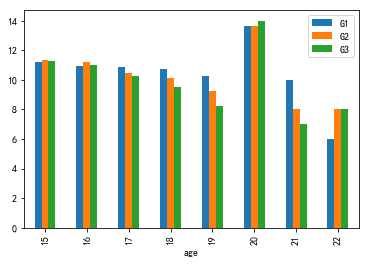

In [15]:
%matplotlib inline
df.describe() # get the range of age 15-22
df.groupby(by="age").mean().loc[:,["G1","G2","G3"]].plot(kind = "bar")

6.统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

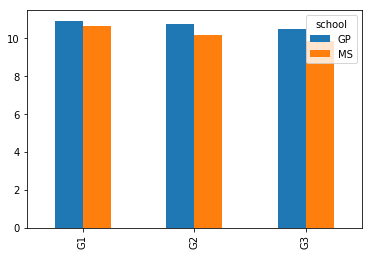

In [93]:
df.groupby(by = "school").mean().loc[:,["G1","G2","G3"]].T.plot(kind = "bar")

7.统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(40分)

In [144]:
df["G_sum"] = df.G1+df.G2+df.G3
df.head()
def top(df,n=10,column="G_sum"):
    return df.sort_values(by = column,ascending=False).head(n)
df.groupby(by = "school").apply(top)


ID school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
school                                                                          
GP     47    47     GP   M   16       U     GT3       T     4     3    health   
       113  113     GP   M   15       U     LE3       T     4     2   teacher   
       110  110     GP   M   15       U     LE3       A     4     4   teacher   
       42    42     GP   M   15       U     GT3       T     4     4  services   
       286  286     GP   F   18       U     GT3       T     2     2   at_home   
       129  129     GP   M   16       R     GT3       T     4     4   teacher   
       245  245     GP   M   16       U     GT3       T     2     1     other   
       293  293     GP   F   17       R     LE3       T     3     1  services   
       198  198     GP   F   17       U     GT3       T     4     4  services   
       306  306     GP   M   20       U     GT3       A     3     2  services   
MS     374  374     MS   F   18       R     LE3       T     4     4     other   
       359  359     MS   F   18       U     LE3       T     1     1   at_home   
       391  391     MS   M   17       U     LE3       T     3     1  services   
       363  363     MS   F   17       U     LE3       T     4     4   at_home   
       378  378     MS   F   18       U     GT3       T     3     3     other   
       376  376     MS   F   20       U     GT3       T     4     2    health   
       380  380     MS   M   18       U     GT3       T     4     4   teacher   
       366  366     MS   M   18       U     LE3       T     4     4   teacher   
       351  351     MS   M   17       U     GT3       T     3     3    health   
       360  360     MS   F   18       R     LE3       A     1     4   at_home   

            ...  freetime goout Dalc  Walc  health  absences  G1  G2  G3 G_sum  
school      ...                                                                 
GP     47   ...         2     2    1     1       2         4  19  19  20    58  
       113  ...         5     2    1     1       3        10  18  19  19    56  
       110  ...         5     3    1     1       4         6  18  19  19    56  
       42   ...         3     3    1     1       5         2  19  18  18    55  
       286  ...         3     3    1     2       2         5  18  18  19    55  
       129  ...         5     5    2     5       4         8  18  18  18    54  
       245  ...         3     3    1     1       4         6  18  18  18    54  
       293  ...         1     2    1     1       3         6  18  18  18    54  
       198  ...         2     4    2     3       2        24  18  18  18    54  
       306  ...         5     3    1     1       5         0  17  18  18    53  
MS     374  ...         4     4    1     1       1         0  19  18  19    56  
       359  ...         3     2    1     1       4         0  18  16  16    50  
       391  ...         4     5    3     4       2         3  14  16  16    46  
       363  ...         3     4    1     1       1         0  16  15  15    46  
       378  ...         1     3    1     2       1         0  15  15  15    45  
       376  ...         4     3    1     1       3         4  15  14  15    44  
       380  ...         2     4    1     4       2         4  15  14  14    43  
       366  ...         2     2    2     2       5         0  13  13  13    39  
       351  ...         5     4    2     3       3         2  13  13  13    39  
       360  ...         3     4    1     4       5         0  13  13  13    39  

[20 rows x 35 columns]

### 本阶段课程意见反馈题(10分送分项，非必答)
- 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，包括自身在哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。



- 知道了pandas大概能做什么
- 还是要多练习,多熟悉



- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

其实pandas的操作需要的是，数据，表现
* 推荐些数据源
* 推荐些这些数据源的操作案例和既有经验
* 展示下Pandas的学习曲线，明确我们课上内容学到的是什么水平，pandas的实操能到什么水平，让大家对未来的自己学习有所预期可以。


<hr>
<center><h1>####答卷结束####</h1></center>